In [56]:
# 基本库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 机器学习模块
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# 集成方法
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb

# 数据预处理
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


In [57]:
# 忽视警告，
import warnings
warnings.filterwarnings('ignore')

In [58]:
# 设置 Matplotlib 字体以避免字体缺失的警告
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [59]:
import pandas as pd

# 使用pandas的read_csv函数读取CSV文件
data = pd.read_csv('train.csv')

data.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0


In [60]:
data = data.drop(columns=['user_id'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,...,3,80,1,29,2,2,1,0,0,0
1,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,...,4,80,1,8,3,3,5,4,0,3
2,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,1066,...,2,80,1,8,3,2,7,7,7,5
3,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,...,2,80,0,10,1,3,10,7,0,9
4,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,...,4,80,0,1,4,3,1,0,1,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   Attrition                 1176 non-null   object
 2   BusinessTravel            1176 non-null   object
 3   DailyRate                 1176 non-null   int64 
 4   Department                1176 non-null   object
 5   DistanceFromHome          1176 non-null   int64 
 6   Education                 1176 non-null   int64 
 7   EducationField            1176 non-null   object
 8   EmployeeCount             1176 non-null   int64 
 9   EmployeeNumber            1176 non-null   int64 
 10  EnvironmentSatisfaction   1176 non-null   int64 
 11  Gender                    1176 non-null   object
 12  HourlyRate                1176 non-null   int64 
 13  JobInvolvement            1176 non-null   int64 
 14  JobLevel                

In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # preprocessing预处理模块 - 用于特征标准化、独热编码和数值编码
# 分离特征数据和标签数据
X = data.drop(['Attrition'], axis=1)  # 特征数据 除了标签以外的列读到x里面
y = data['Attrition']  # 标签数据

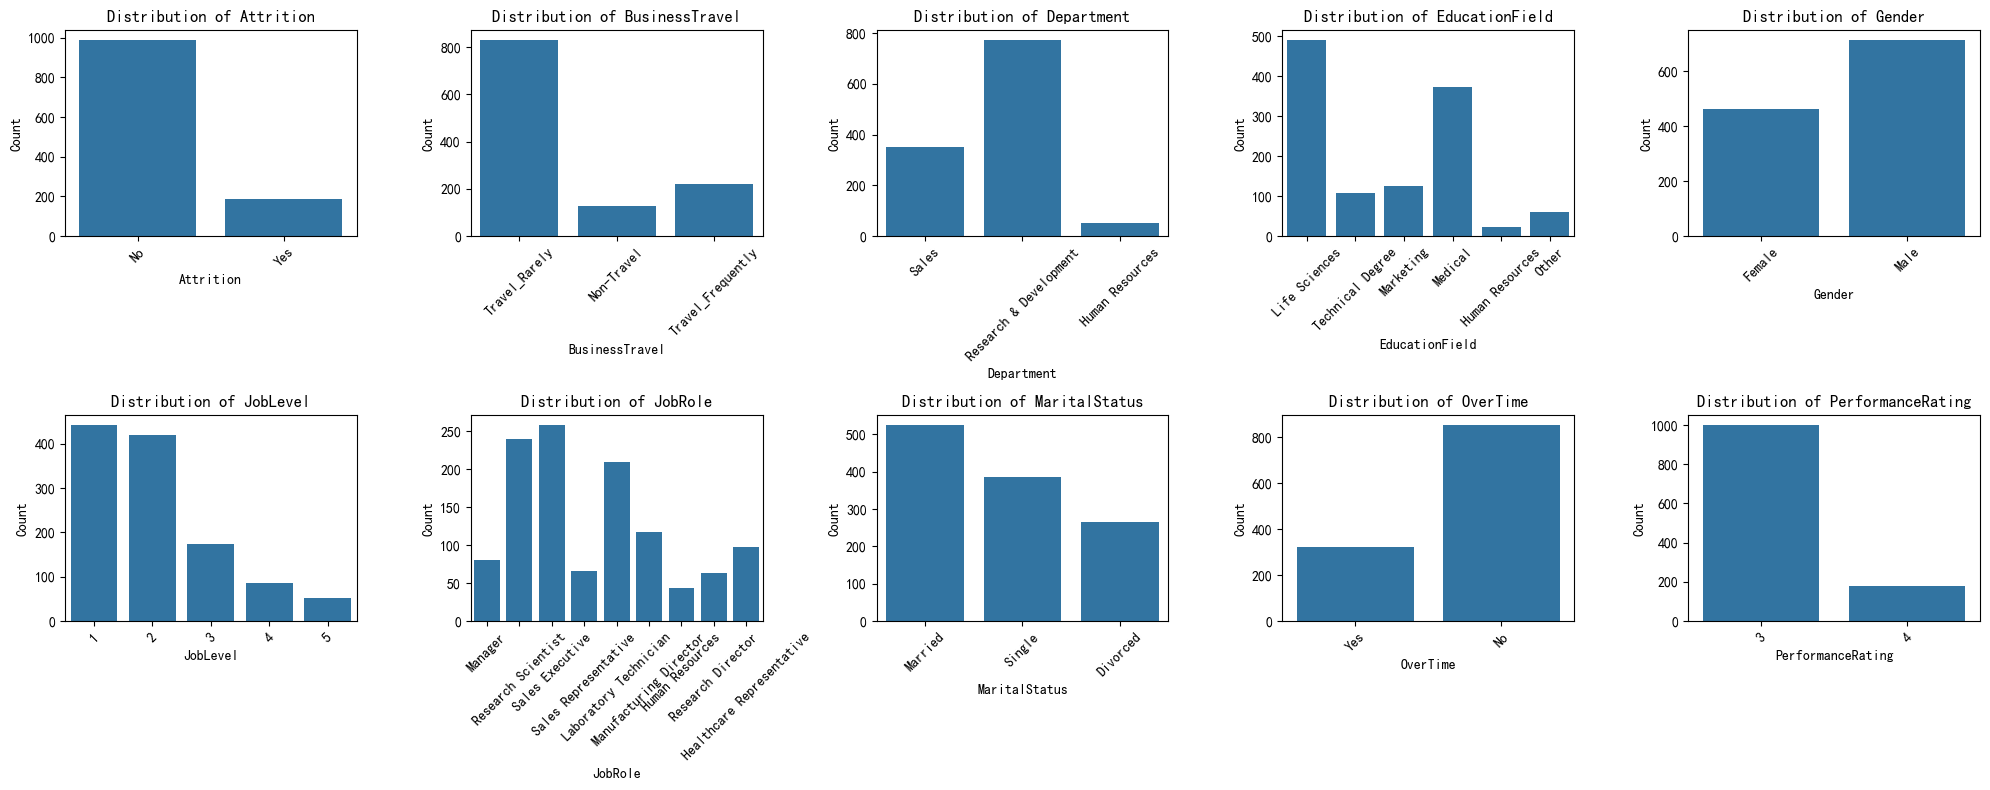

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# 定义离散变量的列名
categorical_columns = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobLevel', 'JobRole', 'MaritalStatus', 'OverTime','PerformanceRating'
]

# 设置每行显示的图的数量
plots_per_row = 5

# 计算需要多少行
num_rows = (len(categorical_columns) + plots_per_row - 1) // plots_per_row

# 创建一个大的画布
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 4 * num_rows))  # 每行高度为 4 英寸

# 如果只有一行，axes 不是二维数组，需要将其转换为二维数组
if num_rows == 1:
    axes = [axes]

# 遍历每个离散变量并绘制条形图
for i, column in enumerate(categorical_columns):
    row = i // plots_per_row
    col = i % plots_per_row
    sns.countplot(x=column, data=data, ax=axes[row][col])
    axes[row][col].set_title(f'Distribution of {column}')
    axes[row][col].set_xlabel(column)
    axes[row][col].set_ylabel('Count')
    axes[row][col].tick_params(axis='x', rotation=45)  # 如果标签过长，旋转标签以便更好地显示

# 隐藏剩余的空白子图
for i in range(len(categorical_columns), num_rows * plots_per_row):
    row = i // plots_per_row
    col = i % plots_per_row
    fig.delaxes(axes[row][col])

# 调整布局
plt.tight_layout()
plt.show()

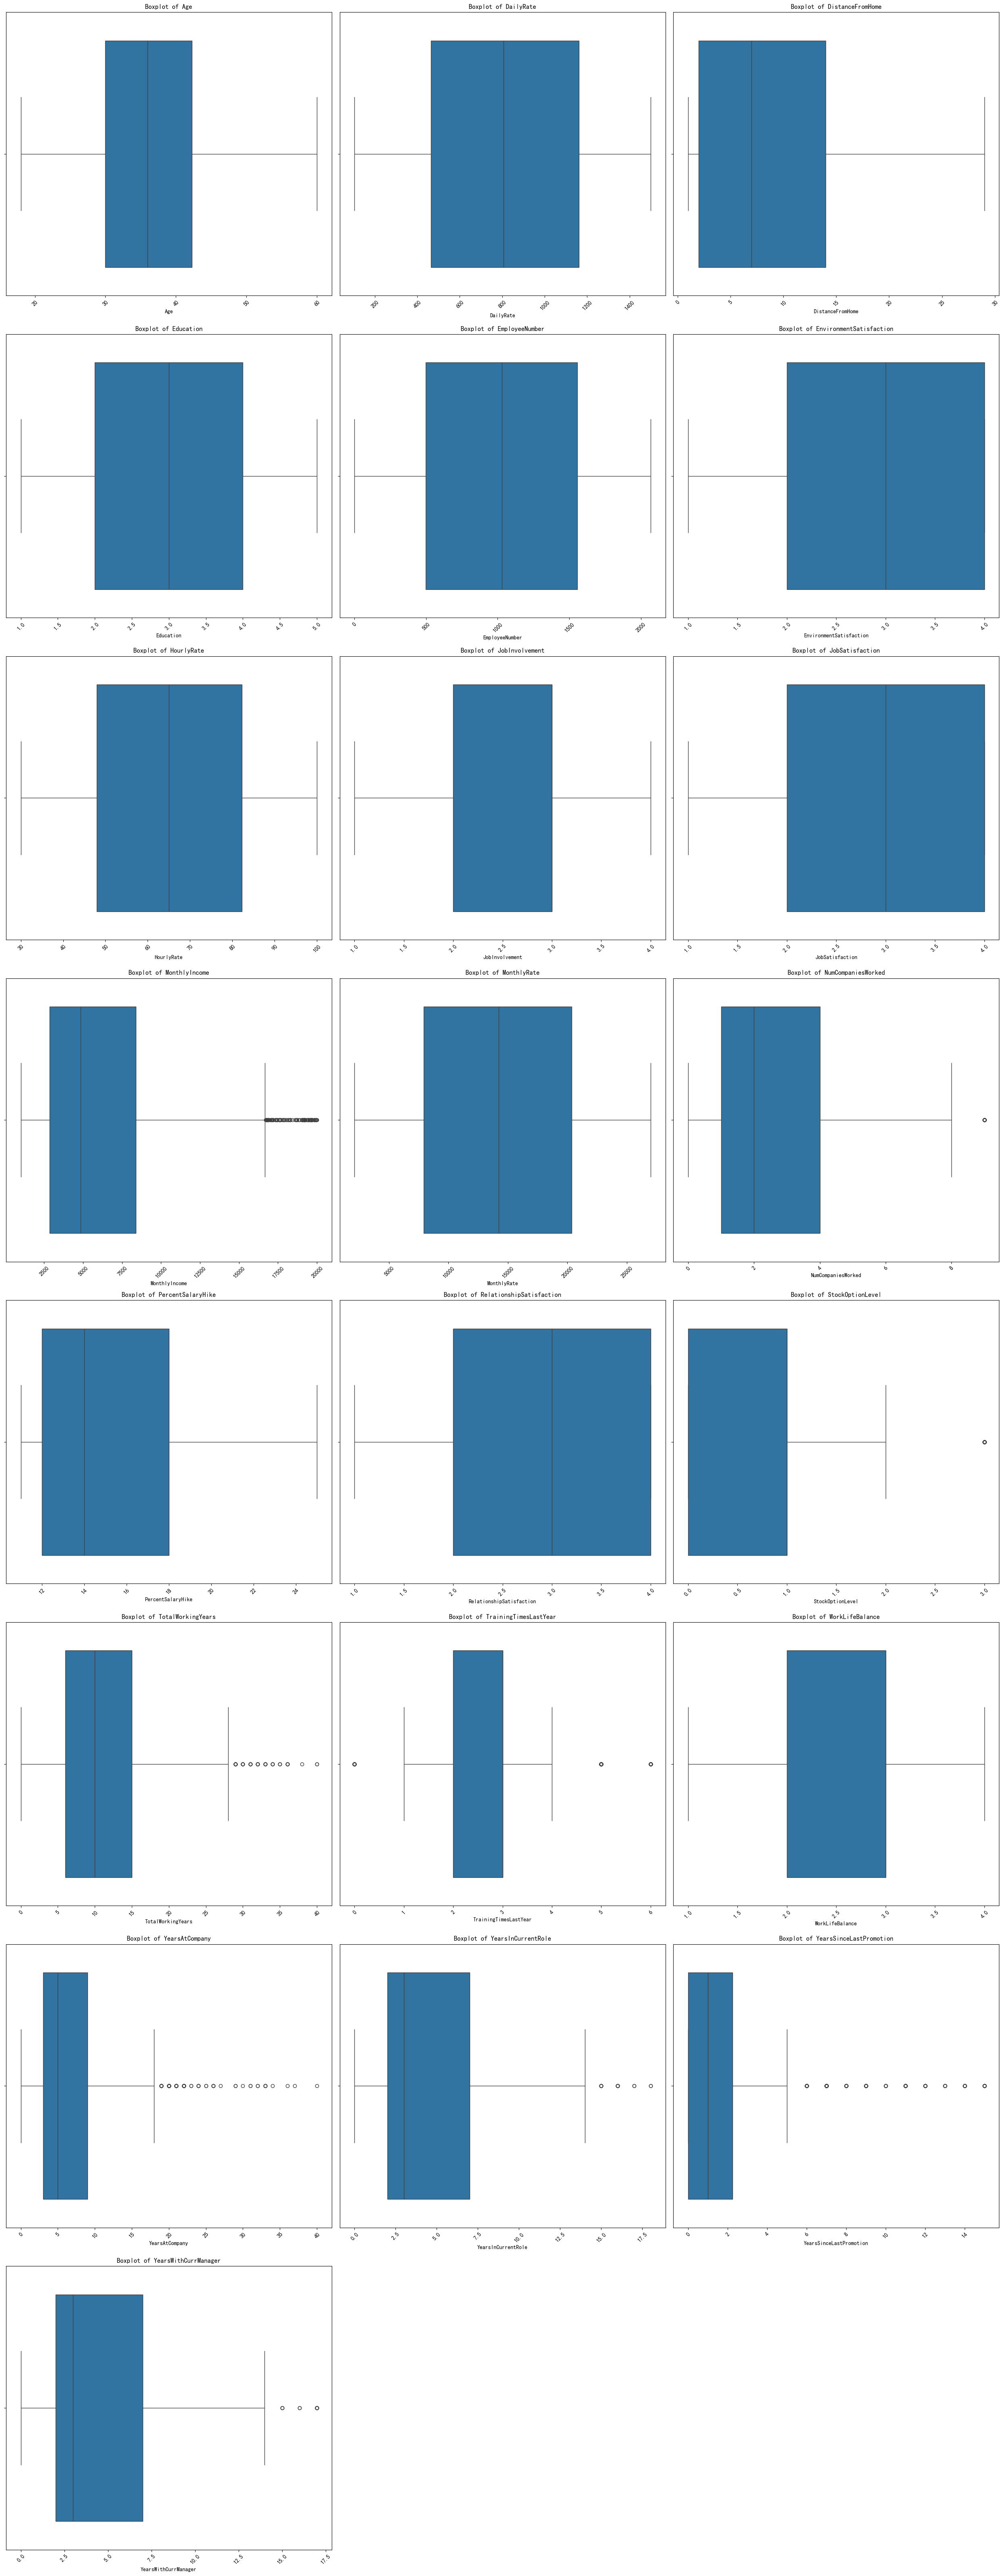

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
df=data
# 定义连续变量的列名
continuous_columns = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
    'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction',
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'RelationshipSatisfaction', 
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# 设置每行显示的图的数量
plots_per_row = 3

# 计算需要多少行
num_rows = (len(continuous_columns) + plots_per_row - 1) // plots_per_row

# 创建一个大的画布
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(25, 8 * num_rows))  # 每行高度为 5 英寸

# 如果只有一行，axes 不是二维数组，需要将其转换为二维数组
if num_rows == 1:
    axes = [axes]

# 遍历每个连续变量并绘制箱线图
for i, column in enumerate(continuous_columns):
    row = i // plots_per_row
    col = i % plots_per_row
    sns.boxplot(x=df[column], ax=axes[row][col])
    axes[row][col].set_title(f'Boxplot of {column}')
    axes[row][col].set_xlabel(column)
    axes[row][col].tick_params(axis='x', rotation=45)  # 如果标签过长，旋转标签以便更好地显示

# 隐藏剩余的空白子图
for i in range(len(continuous_columns), num_rows * plots_per_row):
    row = i // plots_per_row
    col = i % plots_per_row
    fig.delaxes(axes[row][col])

# 调整布局
plt.tight_layout()
plt.show()

In [65]:
# 分离特征数据和标签数据
X = X.drop(['StandardHours','Over18','EmployeeCount'], axis=1)  # 特征数据 除了标签以外的列读到x里面

In [66]:
import numpy as np
y=y.replace({'Yes': 1, 'No': 0})
print(y)

0       0
1       0
2       0
3       0
4       1
       ..
1171    0
1172    0
1173    0
1174    0
1175    0
Name: Attrition, Length: 1176, dtype: int64


In [67]:

digital_cols = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
category_cols = ['BusinessTravel', 'Department',  'Education', 'EducationField',
                'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel','DistanceFromHome',
                'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
                'RelationshipSatisfaction', 'StockOptionLevel', 'PerformanceRating', 'TrainingTimesLastYear','WorkLifeBalance' ]

In [68]:
for col in category_cols:
    # 获取训练集中该列的唯一类别数量
    nunique_tr = data[col].nunique()
    
    # 获取测试集中该列的唯一类别数量
    # nunique_te = test[col].nunique()
    
    # 计算训练集中该列的缺失值比例
    na_tr = len(data.loc[data[col].isna()]) / len(data)
    
    # 计算测试集中该列的缺失值比例
    # na_te = len(test.loc[test[col].isna()]) / len(test)
    
    # 打印结果（使用中文）
    print(f'列名：{col:30}\t训练集唯一类别数量：{nunique_tr:5}\t训练集缺失值比例：{na_tr:.2f}\t')

列名：BusinessTravel                	训练集唯一类别数量：    3	训练集缺失值比例：0.00	
列名：Department                    	训练集唯一类别数量：    3	训练集缺失值比例：0.00	
列名：Education                     	训练集唯一类别数量：    5	训练集缺失值比例：0.00	
列名：EducationField                	训练集唯一类别数量：    6	训练集缺失值比例：0.00	
列名：EmployeeNumber                	训练集唯一类别数量： 1176	训练集缺失值比例：0.00	
列名：EnvironmentSatisfaction       	训练集唯一类别数量：    4	训练集缺失值比例：0.00	
列名：Gender                        	训练集唯一类别数量：    2	训练集缺失值比例：0.00	
列名：JobInvolvement                	训练集唯一类别数量：    4	训练集缺失值比例：0.00	
列名：JobLevel                      	训练集唯一类别数量：    5	训练集缺失值比例：0.00	
列名：DistanceFromHome              	训练集唯一类别数量：   29	训练集缺失值比例：0.00	
列名：JobRole                       	训练集唯一类别数量：    9	训练集缺失值比例：0.00	
列名：JobSatisfaction               	训练集唯一类别数量：    4	训练集缺失值比例：0.00	
列名：MaritalStatus                 	训练集唯一类别数量：    3	训练集缺失值比例：0.00	
列名：OverTime                      	训练集唯一类别数量：    2	训练集缺失值比例：0.00	
列名：RelationshipSatisfaction      	训练集唯一类别数量：    4	训练集缺失值比例：0.00	
列名：StockOptionLevel      

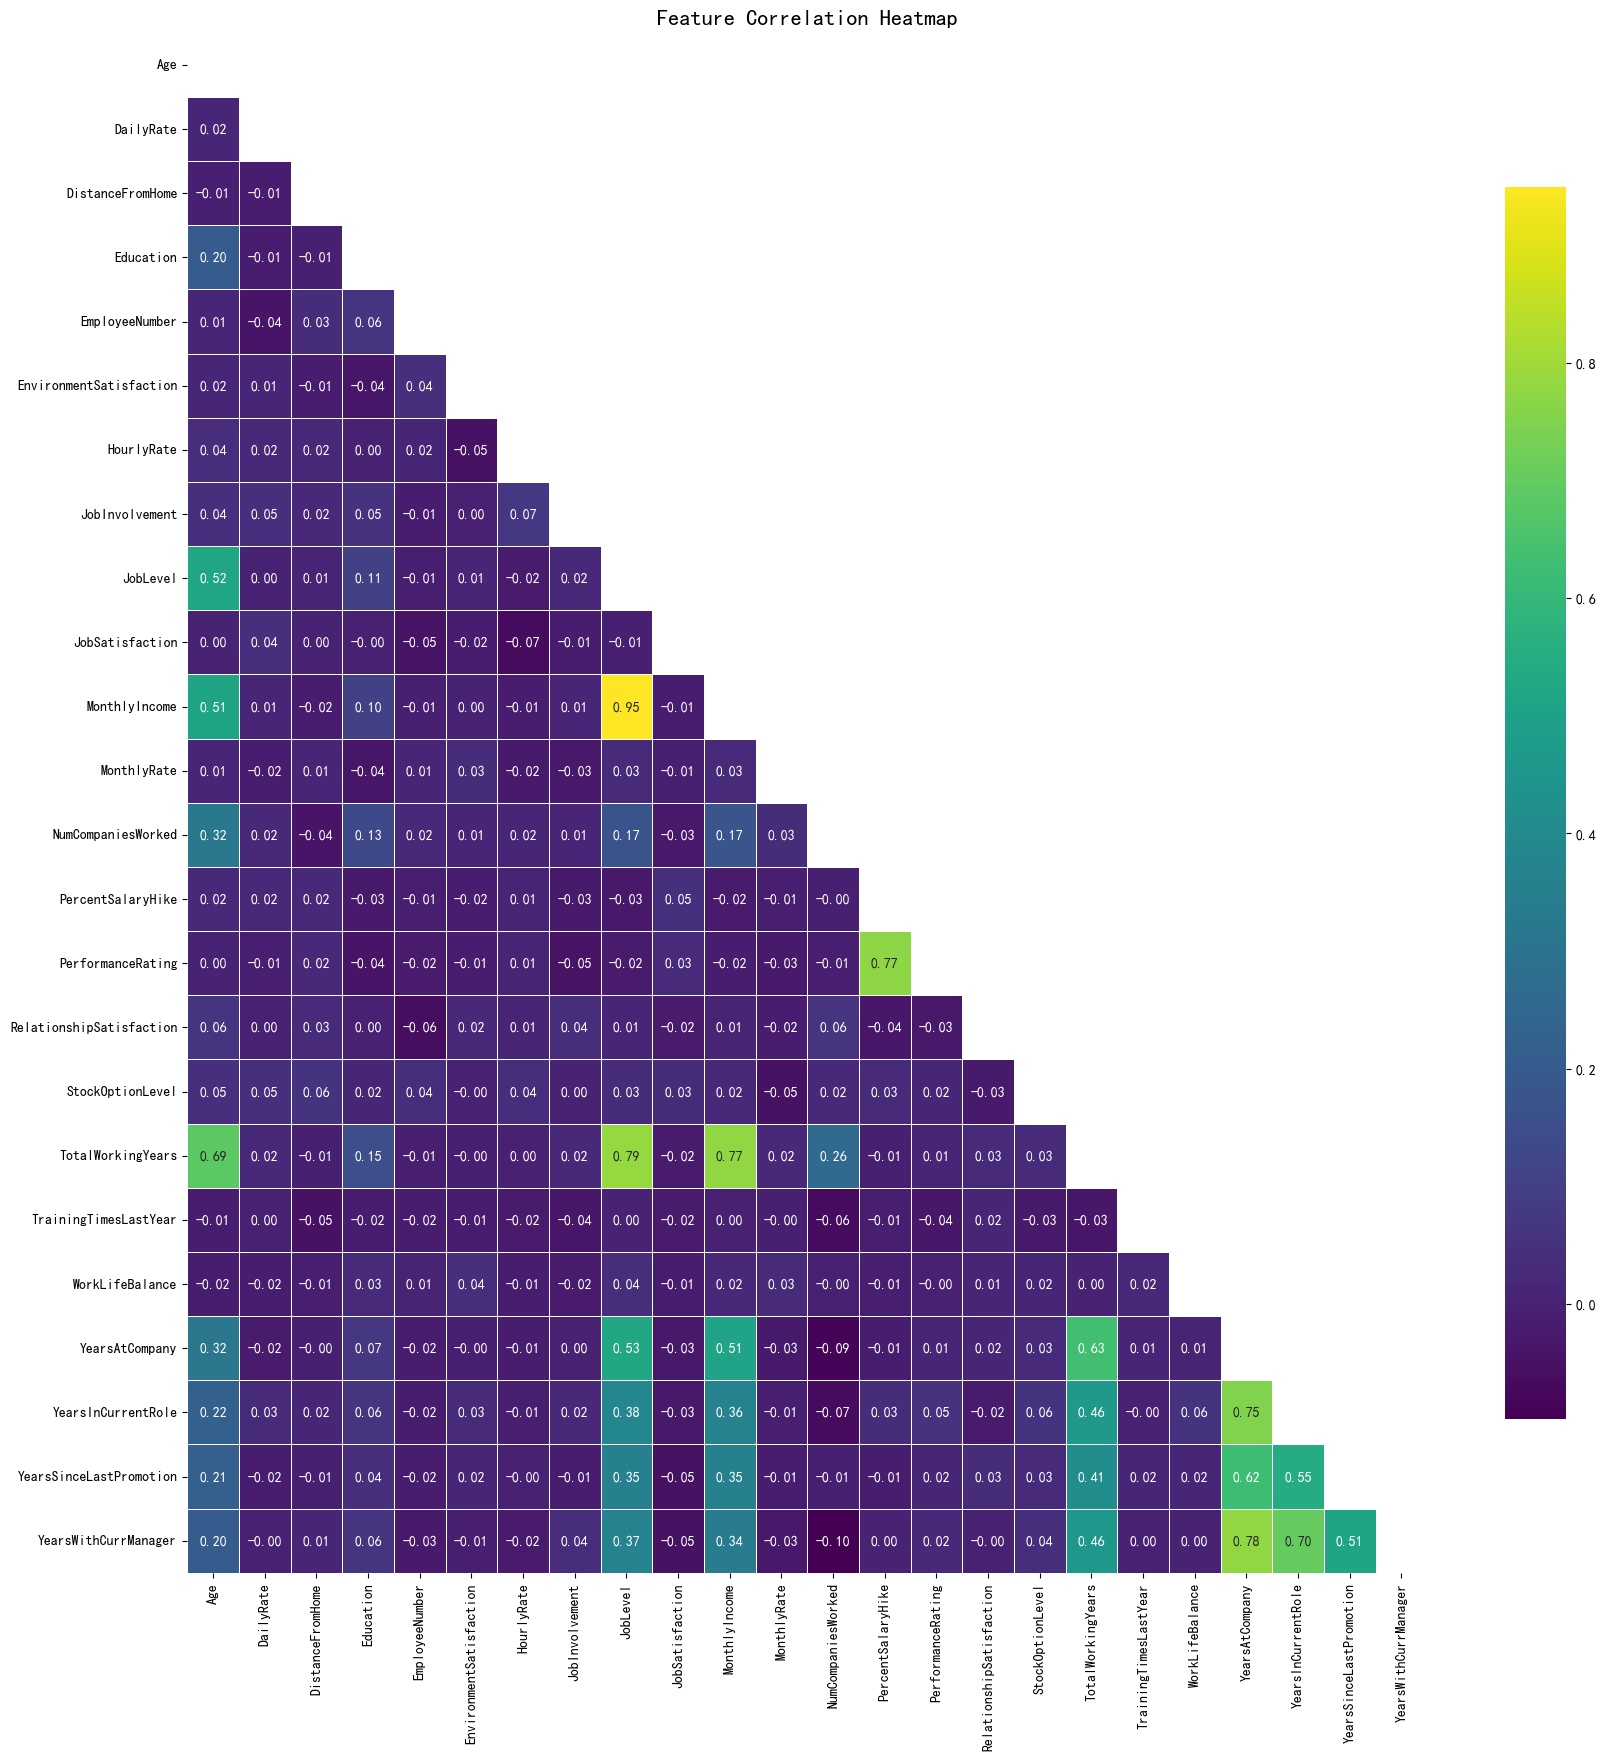

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
# 假设你的数据已经加载到 DataFrame 中，名为 df
# df = pd.read_csv('your_data.csv')

# 删除不相关的列
# columns_to_drop = [ 'EmployeeCount']
# df = df.drop(columns=columns_to_drop, errors='ignore')

# 将布尔型列转换为数值型（0 和 1）
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)

# 筛选出数值型列
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
data_num = X[numeric_columns]

# 计算相关性矩阵
correlation_matrix = data_num.corr()

# 可选：将相关性矩阵的上三角部分设置为 NaN，避免重复显示
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = correlation_matrix.mask(mask)

# 绘制热力图
plt.figure(figsize=(20, 20))  # 设置热力图的大小
sns.heatmap(correlation_matrix_masked, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

In [70]:
X = X.drop(['JobLevel'], axis=1) 

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   DailyRate                 1176 non-null   int64 
 3   Department                1176 non-null   object
 4   DistanceFromHome          1176 non-null   int64 
 5   Education                 1176 non-null   int64 
 6   EducationField            1176 non-null   object
 7   EmployeeNumber            1176 non-null   int64 
 8   EnvironmentSatisfaction   1176 non-null   int64 
 9   Gender                    1176 non-null   object
 10  HourlyRate                1176 non-null   int64 
 11  JobInvolvement            1176 non-null   int64 
 12  JobRole                   1176 non-null   object
 13  JobSatisfaction           1176 non-null   int64 
 14  MaritalStatus           

In [83]:
# 分离连续特征和离散特征
continuous_features = X.select_dtypes(include=['float64', 'int64']).columns # 连续
discrete_features = X.select_dtypes(include=['object']).columns # 离散


# 连续特征标准化
scaler = StandardScaler()
X_continuous = scaler.fit_transform(X[continuous_features]) # 将连续特征进行标准化，均值为0，方差为1


# 对于无序离散特征使用独热编码
onehot_encoder = OneHotEncoder()
X_discrete = onehot_encoder.fit_transform(X[discrete_features])


# 组合处理后的连续特征和离散特征
X = pd.concat([pd.DataFrame(X_continuous, columns=continuous_features),
pd.DataFrame(X_discrete.toarray(), columns=onehot_encoder.get_feature_names_out(discrete_features))], axis=1)


# 使用 train_test_split 函数按照 8:2 的比例划分数据集
# test_size=0.2 表示 20%的数据用作测试集，即验证集。
# random_state 是一个随机数种子，确保每次划分的结果相同，便于复现结果。


In [84]:
from sklearn.model_selection import train_test_split #用于将数据集划分为训练集和测试集
# # 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, 43 to 1126
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                940 non-null    float64
 1   DailyRate                          940 non-null    float64
 2   DistanceFromHome                   940 non-null    float64
 3   Education                          940 non-null    float64
 4   EmployeeNumber                     940 non-null    float64
 5   EnvironmentSatisfaction            940 non-null    float64
 6   HourlyRate                         940 non-null    float64
 7   JobInvolvement                     940 non-null    float64
 8   JobSatisfaction                    940 non-null    float64
 9   MonthlyIncome                      940 non-null    float64
 10  MonthlyRate                        940 non-null    float64
 11  NumCompaniesWorked                 940 non-null    float64
 1

In [86]:
# 分离连续特征和离散特征
continuous_features = X.select_dtypes(include=['float64', 'int64']).columns # 连续
discrete_features = X.select_dtypes(include=['object']).columns # 离散
print(continuous_features)
print(discrete_features)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human

In [87]:
# 保存原始索引
original_index = X_train.index
original_index_test = X_test.index

# 连续特征标准化
scaler = StandardScaler()
X_continuous = scaler.fit_transform(X_train[continuous_features])
X_continuous_df = pd.DataFrame(X_continuous, columns=continuous_features, index=original_index)

# 无序离散特征独热编码
onehot_encoder = OneHotEncoder()
X_discrete = onehot_encoder.fit_transform(X_train[discrete_features])
X_discrete_df = pd.DataFrame(X_discrete.toarray(), columns=onehot_encoder.get_feature_names_out(discrete_features), index=original_index)

# 拼接处理后的特征
X_train = pd.concat([X_continuous_df, X_discrete_df], axis=1)


# 连续特征标准化
X_test_continuous = scaler.transform(X_test[continuous_features])
X_test_continuous_df = pd.DataFrame(X_test_continuous, columns=continuous_features, index=original_index_test)

# 无序离散特征独热编码
X_test_discrete = onehot_encoder.transform(X_test[discrete_features])
X_test_discrete_df = pd.DataFrame(X_test_discrete.toarray(), columns=onehot_encoder.get_feature_names_out(discrete_features), index=original_index_test)

# 拼接处理后的特征
X_test = pd.concat([X_test_continuous_df, X_test_discrete_df], axis=1)


print(X_train)

           Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
43   -0.656539   1.158456         -0.017014  -1.901943       -0.723017   
490   0.337078   1.276514         -0.865136   1.082742        1.734036   
765   0.668284   1.200268          0.709948  -0.907048        1.094231   
575  -0.325333  -0.796873         -0.259335   1.082742        0.945167   
135  -0.104529   1.475736         -0.380495   0.087847       -1.071392   
...        ...        ...               ...        ...             ...   
1044  0.116274   0.113154          1.921551  -0.907048       -0.990998   
1095  0.226676  -1.556870         -0.743976  -0.907048        1.028911   
1130  1.882705  -0.998555          1.194589   1.082742       -0.527055   
860  -1.208549  -1.588844         -0.986297   0.087847        1.573248   
1126 -0.435735   0.410758         -0.259335   0.087847        0.169696   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobSatisfaction  \
43                   0.215551   -

In [88]:
y_train.value_counts()

Attrition
0    801
1    139
Name: count, dtype: int64

In [89]:
y_test.value_counts()

Attrition
0    187
1     49
Name: count, dtype: int64

In [90]:
print(X_train.dtypes)


Age                                  float64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EmployeeNumber                       float64
EnvironmentSatisfaction              float64
HourlyRate                           float64
JobInvolvement                       float64
JobSatisfaction                      float64
MonthlyIncome                        float64
MonthlyRate                          float64
NumCompaniesWorked                   float64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBalance                      float64
YearsAtCompany                       float64
YearsInCurrentRole                   float64
YearsSinceLastPromotion              float64
YearsWithC

In [91]:
# 对训练集进行过采样

from imblearn.over_sampling import SMOTE

# 使用 SMOTE 进行过采样,并赋值给自己
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### 逻辑回归

最优参数组合: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
模型准确率: 0.7372881355932204
分类报告:
              precision    recall  f1-score   support

           0       0.93      0.73      0.81       187
           1       0.43      0.78      0.55        49

    accuracy                           0.74       236
   macro avg       0.68      0.75      0.68       236
weighted avg       0.82      0.74      0.76       236

F1 值: 0.7596310694749044


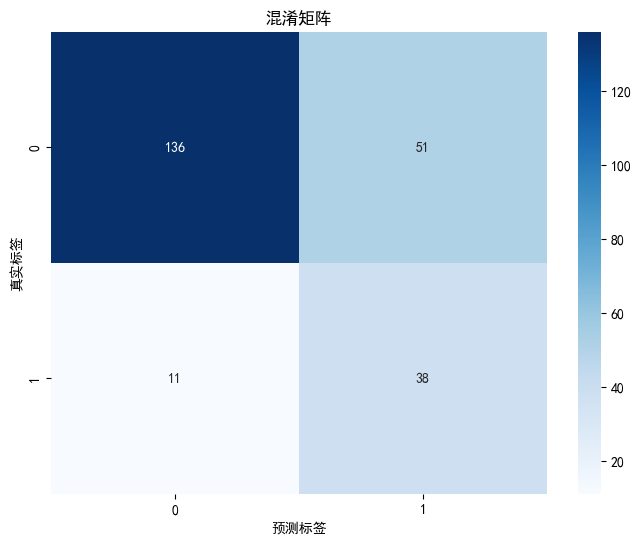

AUC 值: 0.8163265306122448


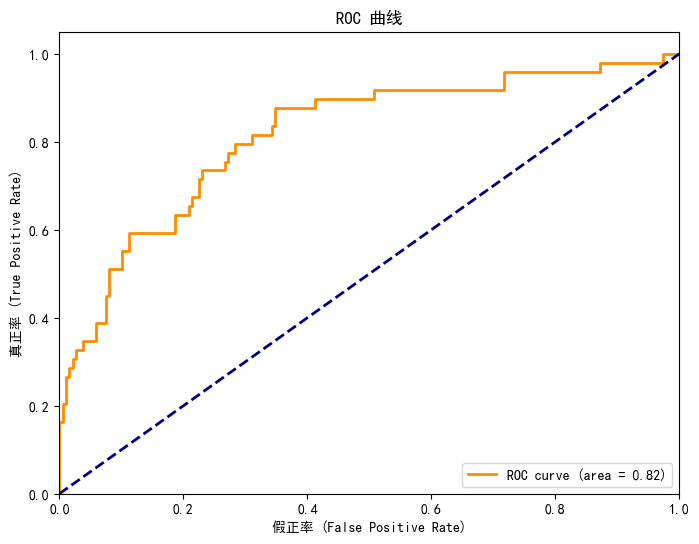

In [92]:
from sklearn.model_selection import GridSearchCV
# 定义逻辑回归模型
logreg = LogisticRegression()

# 定义要搜索的参数网格
param_grid = {
    'C': [0.1, 1, 10,100],  # 正则化强度的倒数
    'penalty': ['l1', 'l2'],  # 正则化类型
    'solver': ['liblinear']  # 优化算法
}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_weighted')

# 在训练集上进行网格搜索
grid_search.fit(X_train, y_train)

# 输出最优参数组合
print("最优参数组合:", grid_search.best_params_)

# 使用最优参数的模型进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 预测正类的概率
y_score = best_model.predict_proba(X_test)[:, 1]

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy}")

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred))

# 计算 F1 值
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 值: {f1}")

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')
plt.show()

# 计算 ROC 曲线的假正率、真正率和阈值
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# 计算 AUC 值
roc_auc = auc(fpr, tpr)
print(f"AUC 值: {roc_auc}")

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率 (False Positive Rate)')
plt.ylabel('真正率 (True Positive Rate)')
plt.title('ROC 曲线')
plt.legend(loc="lower right")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 641, number of negative: 640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6154
[LightGBM] [Info] Number of data points in the train set: 1281, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500390 -> initscore=0.001561
[LightGBM] [Info] Start training from score 0.001561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

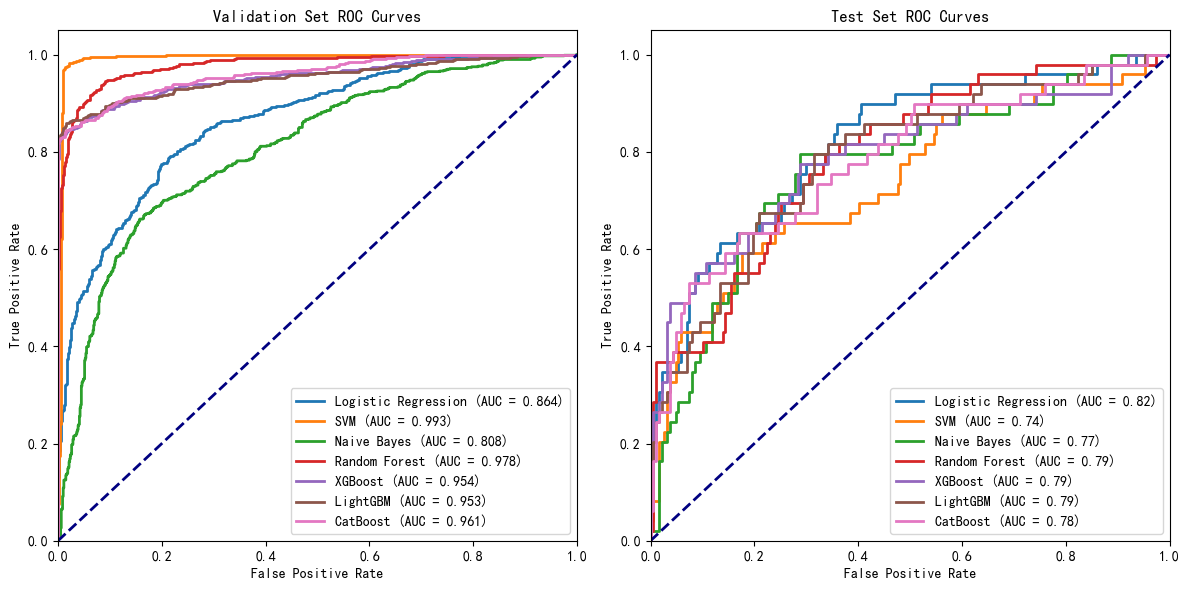

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# 假设你已经有了数据集 X_train, X_test, y_train, y_test

        # max_depth=10, max_features='sqrt', min_samples_leaf=1,
        # min_samples_split=10, n_estimators=200
# 定义模型及其最佳参数
models = {
    "Logistic Regression": LogisticRegression(C= 0.05696421076895237, solver= 'lbfgs'),
    "SVM": SVC(C=10, gamma='auto', kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(var_smoothing=1e-5),
    "Random Forest": RandomForestClassifier(
        max_depth=15, min_samples_leaf=5,
        min_samples_split=14, n_estimators=200
    ),
    "XGBoost": xgb.XGBClassifier(
        colsample_bytree=0.8, learning_rate=0.1, max_depth=3,
        n_estimators=100, subsample=0.8
    ),
    "LightGBM": lgb.LGBMClassifier(
        colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
        n_estimators=100, num_leaves=31, subsample=0.8
    ),
    "CatBoost":cb.CatBoostClassifier(verbose=0,iterations=395, depth=7, 
                        learning_rate= 0.3156251048306349, l2_leaf_reg= 10.938235283132196, border_count= 73)
}

# 绘制验证集的 ROC 曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 左边图：验证集

for name, model in models.items():
    # 使用交叉验证获取验证集的预测概率
    y_pred_val = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_pred_val)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curves')
plt.legend(loc="lower right")

# 绘制测试集的 ROC 曲线
plt.subplot(1, 2, 2)  # 右边图：测试集

for name, model in models.items():
    # 训练模型并在测试集上进行预测
    model.fit(X_train, y_train)
    y_pred_test = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curves')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb

# 假设 X_train, X_test, y_train, y_test 是你已经准备好的训练和测试数据

# 定义基础学习器（模型）
base_learners = [
    ('logreg', LogisticRegression(C=0.05696421076895237, solver='lbfgs')),
    ('xgboost', XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3,
                    n_estimators=100, subsample=0.8)),
    ('lightgbm', lgb.LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
                                    n_estimators=100, num_leaves=31, subsample=0.8)),
    # ('catboost', cb.CatBoostClassifier(verbose=0, iterations=395, depth=7, 
    #                                     learning_rate=0.3156251048306349, l2_leaf_reg=10.938235283132196, 
    #                                     border_count=73)),
    ('svm',SVC(C=10, probability=True))
]

# 定义元学习器（第二层分类器）
meta_learner = LogisticRegression()

# 定义StackingClassifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# 训练Stacking模型
stacking_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_stacking = stacking_model.predict_proba(X_test)[:, 1]

# 计算AUC分数
stacking_auc = roc_auc_score(y_test, y_pred_stacking)
print(f"Stacking AUC: {stacking_auc:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 801, number of negative: 801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6161
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [95]:
from sklearn.preprocessing import LabelEncoder

# 创建 LabelEncoder 对象
le = LabelEncoder()

# 对 y_train 进行编码
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
# 打印转换后的结果
print(y_train)

[0 0 0 ... 1 1 1]


In [96]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

# 假设你已经有了数据集 X 和标签 y
# X 是特征矩阵，y 是标签向量


# 定义朴素贝叶斯模型
nb = GaussianNB()

# 定义参数网格
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # 方差平滑参数
}

# 初始化网格搜索
grid_search = GridSearchCV(
    estimator=nb,  # 模型
    param_grid=param_grid,  # 参数网格
    cv=5,  # 五折交叉验证
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    n_jobs=-1  # 使用所有可用的CPU核心
)

# 在训练集上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数组合:", grid_search.best_params_)

# 使用最佳参数训练模型
best_nb = grid_search.best_estimator_

# 在测试集上进行预测
y_pred_proba = best_nb.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 输出测试集 AUC
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

y_pred = best_nb.predict(X_test)
# 计算 F1 值
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 值: {f1}")

最佳参数组合: {'var_smoothing': 1e-09}
测试集 AUC:  0.7684164574920878
F1 值: 0.6382525292340034
